In [81]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
import pandas as pd

In [82]:
# Create random 2d data
mu = np.array([10,13])
sigma = np.array([[3.5, -1.8], [-1.8,3.5]])

print("Mu ", mu.shape)
print("Sigma ", sigma.shape)

# Create 1000 samples using mean and sigma
org_data = rnd.multivariate_normal(mu, sigma, size=(1000))
print("Data shape ", org_data.shape)

Mu  (2,)
Sigma  (2, 2)
Data shape  (1000, 2)


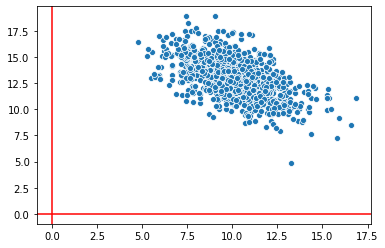

In [83]:
plt.axvline(x=0, ymin=0, ymax=1, c='red')
plt.axhline(y=0, xmin=0, xmax=1, c='red')
sns.scatterplot(org_data[:,0], org_data[:,1])
plt.show()

In [84]:
mean = np.mean(org_data, axis= 0)
mean_data = org_data - mean
print("Data sau khi trừ đi mean của từng giá trị ", mean.shape, "\n")

Data sau khi trừ đi mean của từng giá trị  (2,) 



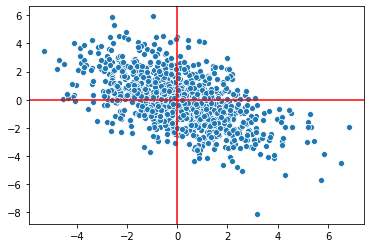

In [85]:
plt.axvline(x=0, ymin=0, ymax=1, c='red')
plt.axhline(y=0, xmin=0, xmax=1, c='red')
sns.scatterplot(x=mean_data[:,0], y=mean_data[:,1])
plt.show()

In [86]:
# Compute covariance matrix
cov = np.cov(mean_data.T)
print("Covariance matrix ", cov.shape, "\n")

Covariance matrix  (2, 2) 



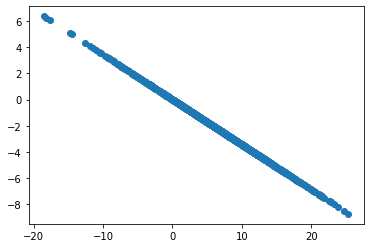

In [87]:
org_data=np.cov(org_data)
plt.scatter(org_data[:, 0], org_data[:, 1])
plt.show()

In [88]:
eig_val, eig_vec = np.linalg.eig(cov)

In [95]:
sorted_index = np.argsort(eig_val)[::-1]
sorted_eigenvalue = eig_val[sorted_index]
sorted_eigenvectors = eig_vec[:,sorted_index]

In [96]:
n_components = 1
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [97]:
pca_data = np.dot(mean_data, eigenvector_subset.T)
print("Transformed data ", pca_data.shape)

ValueError: shapes (1000,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)

In [92]:
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1])

IndexError: index 1 is out of bounds for axis 1 with size 1

In [22]:
pca_data

array([[ 1.86469926, -0.65441256],
       [-5.40077116, -0.17950539],
       [ 2.62330703,  0.6024476 ],
       ...,
       [-1.04413896, -0.43841769],
       [ 4.05718469, -0.23050338],
       [ 0.93479393, -0.10383103]])

EX2

In [98]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [99]:
data

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [104]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
data = data.loc[:, features].values

In [105]:
data = data - data.mean(axis=0)

In [107]:
data_std = data/ np.std(data, axis=0)
cov_mat = np.cov(data_std.T)

In [108]:
e, v = np.linalg.eig(cov_mat)
print('E-value:', e)
print('E-vector', v)

E-value: [2.93035378 0.92740362 0.14834223 0.02074601]
E-vector [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [109]:
max_vec = v[:, e.argsort()[::-1][:2]]
print(max_vec)

[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [110]:
data = data_std.dot(max_vec)

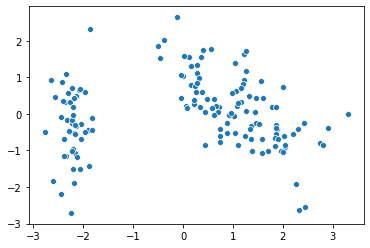

In [113]:
sns.scatterplot(data[:,0], data[:,1])

EX3

In [117]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_new = pca.fit_transform(data)

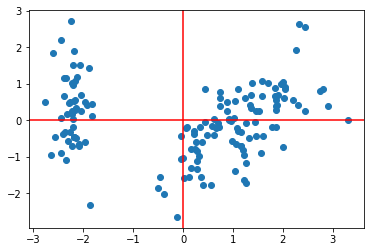

In [119]:
plt.scatter(data_new[:,0], data_new[:,1])
plt.axvline(x=0, ymin=0, ymax=1, lw=1.5, label='boudary', c='red')
plt.axhline(y=0, xmin=0, xmax=1, lw=1.5, c='red')
plt.show()